In [1]:
from gensim import corpora, models
import math

import matplotlib.pyplot as plt


def ldamodel(num_topics, pwd):
    cop = open(pwd, 'r', encoding='ISO-8859-1')
 
    train = []
    for line in cop.readlines():
        line = [word.strip() for word in line.split(' ')]
        train.append(line) 
         
    dictionary = corpora.Dictionary(train)
    corpus = [dictionary.doc2bow(text) for text in train] 
    
    corpora.MmCorpus.serialize('corpus.mm', corpus)
    lda = models.LdaModel(corpus=corpus, id2word=dictionary, random_state=1,
                          num_topics=num_topics)  
 
    topic_list = lda.print_topics(num_topics, 10)

    return lda, dictionary

In [2]:
def perplexity(ldamodel, testset, dictionary, size_dictionary, num_topics):
    print('the info of this ldamodel: \n')
    print('num of topics: %s' % num_topics)
    prep = 0.0
    prob_doc_sum = 0.0
    topic_word_list = [] 
    for topic_id in range(num_topics):
        topic_word = ldamodel.show_topic(topic_id, size_dictionary)
        dic = {}
        for word, probability in topic_word:
            dic[word] = probability
        topic_word_list.append(dic)  
    doc_topics_ist = []  
    for doc in testset:
        doc_topics_ist.append(ldamodel.get_document_topics(doc, minimum_probability=0))
    testset_word_num = 0
    for i in range(len(testset)):
        prob_doc = 0.0  
        doc = testset[i]
        doc_word_num = 0  
        for word_id, num in dict(doc).items():
            prob_word = 0.0  
            doc_word_num += num
            word = dictionary[word_id]
            for topic_id in range(num_topics):
                # cal p(w) : p(w) = sumz(p(z)*p(w|z))
                prob_topic = doc_topics_ist[i][topic_id][1]
                prob_topic_word = topic_word_list[topic_id][word]
                prob_word += prob_topic * prob_topic_word
            prob_doc += math.log(prob_word)  # p(d) = sum(log(p(w)))
        prob_doc_sum += prob_doc
        testset_word_num += doc_word_num
    prep = math.exp(-prob_doc_sum / testset_word_num)  # perplexity = exp(-sum(p(d)/sum(Nd))
    print("模型困惑度为 : %s" % prep)
    return prep

In [12]:
def graph_draw(topic, perplexity):  
    x = topic
    y = perplexity
    plt.plot(x, y, color="red", linewidth=2)
    plt.xlabel("Number of Topic")
    plt.ylabel("Perplexity")
    plt.savefig("衰退期Perplexity-Topics")
    plt.show()

抽样为20时的perplexity
the info of this ldamodel: 

num of topics: 1
模型困惑度为 : 1147.1516791723056
the info of this ldamodel: 

num of topics: 2
模型困惑度为 : 1018.0796070161376
the info of this ldamodel: 

num of topics: 3
模型困惑度为 : 776.4808038790109
the info of this ldamodel: 

num of topics: 4
模型困惑度为 : 622.3612182714058
the info of this ldamodel: 

num of topics: 5
模型困惑度为 : 546.4459898486142
the info of this ldamodel: 

num of topics: 6
模型困惑度为 : 477.603393012459
the info of this ldamodel: 

num of topics: 7
模型困惑度为 : 417.14129644324794
the info of this ldamodel: 

num of topics: 8
模型困惑度为 : 374.7040555378434
the info of this ldamodel: 

num of topics: 9
模型困惑度为 : 352.4399385053639
the info of this ldamodel: 

num of topics: 10
模型困惑度为 : 330.72102498625657


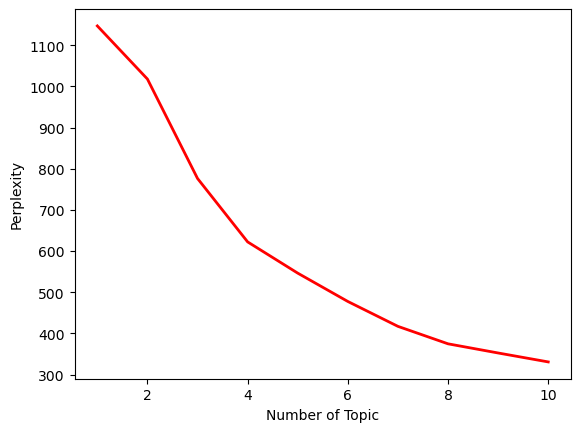

In [13]:
if __name__ == '__main__':
    pwd = 'D:/情感分析/data/衰退期.xlsx'
    for i in range(20,21,1): 
        print("抽样为"+str(i)+"时的perplexity")
        a=range(1,11,1) # 主题个数
        p=[]
        for num_topics in a:
            lda, dictionary = ldamodel(num_topics, pwd)
            corpus = corpora.MmCorpus('corpus.mm')
            testset = []
            for c in range(int(corpus.num_docs/i)):
                testset.append(corpus[c*i])
            prep = perplexity(lda, testset, dictionary, len(dictionary.keys()), num_topics)
            p.append(prep)
        graph_draw(a,p)
